In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Interpolasi Menggunakan Metode Natural Cubic Spline

## Mencari Interpolasi Polinomial Orde 9 `p_9(t)`

In [28]:
t_values = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540])
x_values = np.array([0, 2.73, 2.70, 2.62, 2.68, 2.68, 2.64, 2.72, 2.69, 2.55])
y_values = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

In [29]:
def natural_cubic_spline(x, y):
    n = len(x)
    
    # Langkah 1: Inisialisasi
    a       = np.array(y)
    delta   = np.diff(x)        # delta_i = x_{i+1} - x_i
    delta_y = np.diff(y)        # Delta_i = y_{i+1} - y_i
    
    # Langkah 2: Bangun sistem tridiagonal
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    A[0,   0] = 1   # Kondisi natural spline
    A[-1, -1] = 1   # Kondisi natural spline
    
    # Langkah 3: Selesaikan sistem linear
    # Bangun matriks A dan vektor b
    for i in range(1, n-1):
        A[i, i-1]   = delta[i-1]
        A[i, i]     = 2 * (delta[i-1] + delta[i])
        A[i, i+1]   = delta[i]
        b[i]        = 3 * (delta_y[i] / delta[i] - delta_y[i-1] / delta[i-1])
    
    print(A)
    print(b)
    
    c = np.linalg.solve(A, b)
    
    # Langkah 4: Hitung koefisien lainnya
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    for i in range(n-1):
        d[i] = (c[i+1] - c[i]) / (3 * delta[i])
        b[i] = (delta_y[i] / delta[i]) - (delta[i] / 3) * (2 * c[i] + c[i+1])
    
    # Return koefisien a, b, c, d
    return a[:-1], b, c[:-1], d

In [30]:
def evaluate_polynomial(x, coefficients, eval_points):
    a, b, c, d = coefficients
    n = len(a)
    results = []
    
    for xp in eval_points:
        # Temukan interval [x_i, x_{i+1}] untuk xp
        for i in range(n):
            if x[i] <= xp <= x[i+1]:
                dx = xp - x[i]
                results.append(a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3)
                break
    
    return np.array(results)

In [31]:
x_coef = natural_cubic_spline(t_values, x_values)
y_coef = natural_cubic_spline(t_values, y_values)

[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 60. 240.  60.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  60. 240.  60.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  60. 240.  60.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  60. 240.  60.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  60. 240.  60.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  60. 240.  60.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  60. 240.  60.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  60. 240.  60.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.]]
[ 0.     -0.138  -0.0025  0.007  -0.003  -0.002   0.006  -0.0055 -0.0055
  0.    ]
[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 60. 240.  60.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  60. 240.  60.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  60. 240.  60.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  60. 240.  60.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  60. 240.  60.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  60. 240.  60.   0.   0.]
 [  0.   0.   0

In [32]:
x_coef

(array([0.  , 2.73, 2.7 , 2.62, 2.68, 2.68, 2.64, 2.72, 2.69]),
 array([ 0.05771759,  0.02106483, -0.0069769 ,  0.00134278,  0.00060578,
        -0.00076591,  0.00045787,  0.00093442, -0.00169555]),
 array([ 5.78241159e-20, -6.10879270e-04,  1.43517080e-04, -4.85571587e-06,
        -7.42754964e-06, -1.54340856e-05,  3.58305586e-05, -2.78881490e-05,
        -1.59446294e-05]),
 array([-3.39377372e-06,  4.19109083e-06, -8.24293309e-07, -1.42879654e-08,
        -4.44807553e-08,  2.84803579e-07, -3.53992820e-07,  6.63528864e-08,
         8.85812746e-08]))

In [33]:
y_coef

(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40]),
 array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [34]:
t_eval = np.linspace(0, 540, 541)
x_eval = evaluate_polynomial(t_values, x_coef, t_eval)
y_eval = evaluate_polynomial(t_values, y_coef, t_eval)

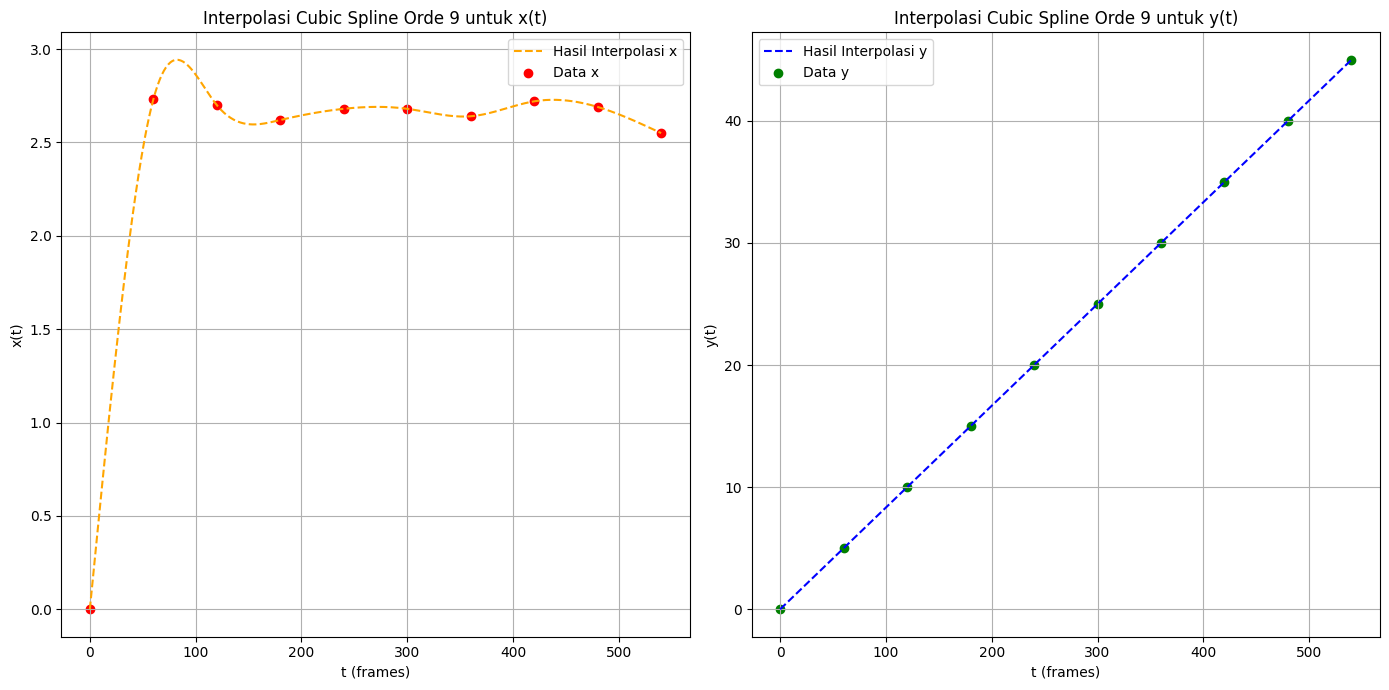

In [35]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_eval, x_eval, '--', color='orange', label="Hasil Interpolasi x")
plt.scatter(t_values, x_values, color='red', label="Data x")
plt.title("Interpolasi Cubic Spline Orde 9 untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_eval, y_eval, '--', color='blue', label="Hasil Interpolasi y")
plt.scatter(t_values, y_values, color='green', label="Data y")
plt.title("Interpolasi Cubic Spline Orde 9 untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## *Export* Hasil Evaluasi `p_9(t)` dan `p_10(t)` ke dalam File `csv`

In [36]:
# Export Hasil Evaluasi Natural Cubic Spline x p_9(t) ke CSV
with open("Evaluasi/cubic_spline_x.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["t", "x(t)"])
    for i in range(len(t_eval)):
        writer.writerow([t_eval[i], x_eval[i]])

# Export Hasil Evaluasi Natural Cubic Spline y p_9(t) ke CSV
with open("Evaluasi/cubic_spline_y.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["t", "y(t)"])
    for i in range(len(t_eval)):
        writer.writerow([t_eval[i], y_eval[i]])